In [88]:
# Importando as bibliotecas necessárias:
import pydot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image  
from matplotlib.colors import ListedColormap

# Importando as bilbiotecas Scikit Learn:
from sklearn import tree
from sklearn.datasets import make_moons
from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Importando as métricas:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# Gerando o dataset:
x, y = make_moons(n_samples= 10000, noise = 0.4, random_state = 42)

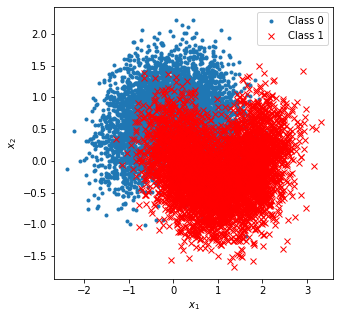

In [ ]:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

fig = plt.figure(figsize=(5,5))
plt.plot(x[idx0,0], x[idx0,1], '.', label='Class 0')
plt.plot(x[idx1,0], x[idx1,1], 'rx', label='Class 1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

In [ ]:
# Dividindo em conjunto de treinamento e teste:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.25, random_state=42)

In [ ]:
# Definindo os parâmetros:
param_grid = [{'criterion': ['gini', 'entropy'], 'max_depth': [None, 1, 2, 5, 10, 15, 25], 'max_leaf_nodes': [None, 2, 5, 10, 15, 25, 50, 100]}]
clf = DecisionTreeClassifier()

# Instânciando o Grid Search:
gscv = GridSearchCV(DTC, param_grid, cv=5, verbose=3, n_jobs=-1)

# Executando o GridSearch:
gscv.fit(x, y)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 204 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 560 out of 560 | elapsed:    6.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                    

In [ ]:
# Imprimindo os resultados:
print('Melhores parâmetros: {}'.format(gscv.best_params_))
print('Score: {}'.format(gscv.best_score_))

Melhores parâmetros: {'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 25}
Score: 0.8596


In [ ]:
# Instânciando a Árvore de Decisão:
clf = DecisionTreeClassifier(criterion='gini', max_depth = None, max_leaf_nodes = 25)

# Treinamendo o modelo:
clf.fit(X_train, y_train)

# Validando o modelo::
y_pred = clf.predict(X_test)

In [ ]:
# Imprimindo a acurácia:
print('Acurácia: {}'.format(accuracy_score(y_test, y_pred)))

Acurácia: 0.8648


# **Árvore de decisao**

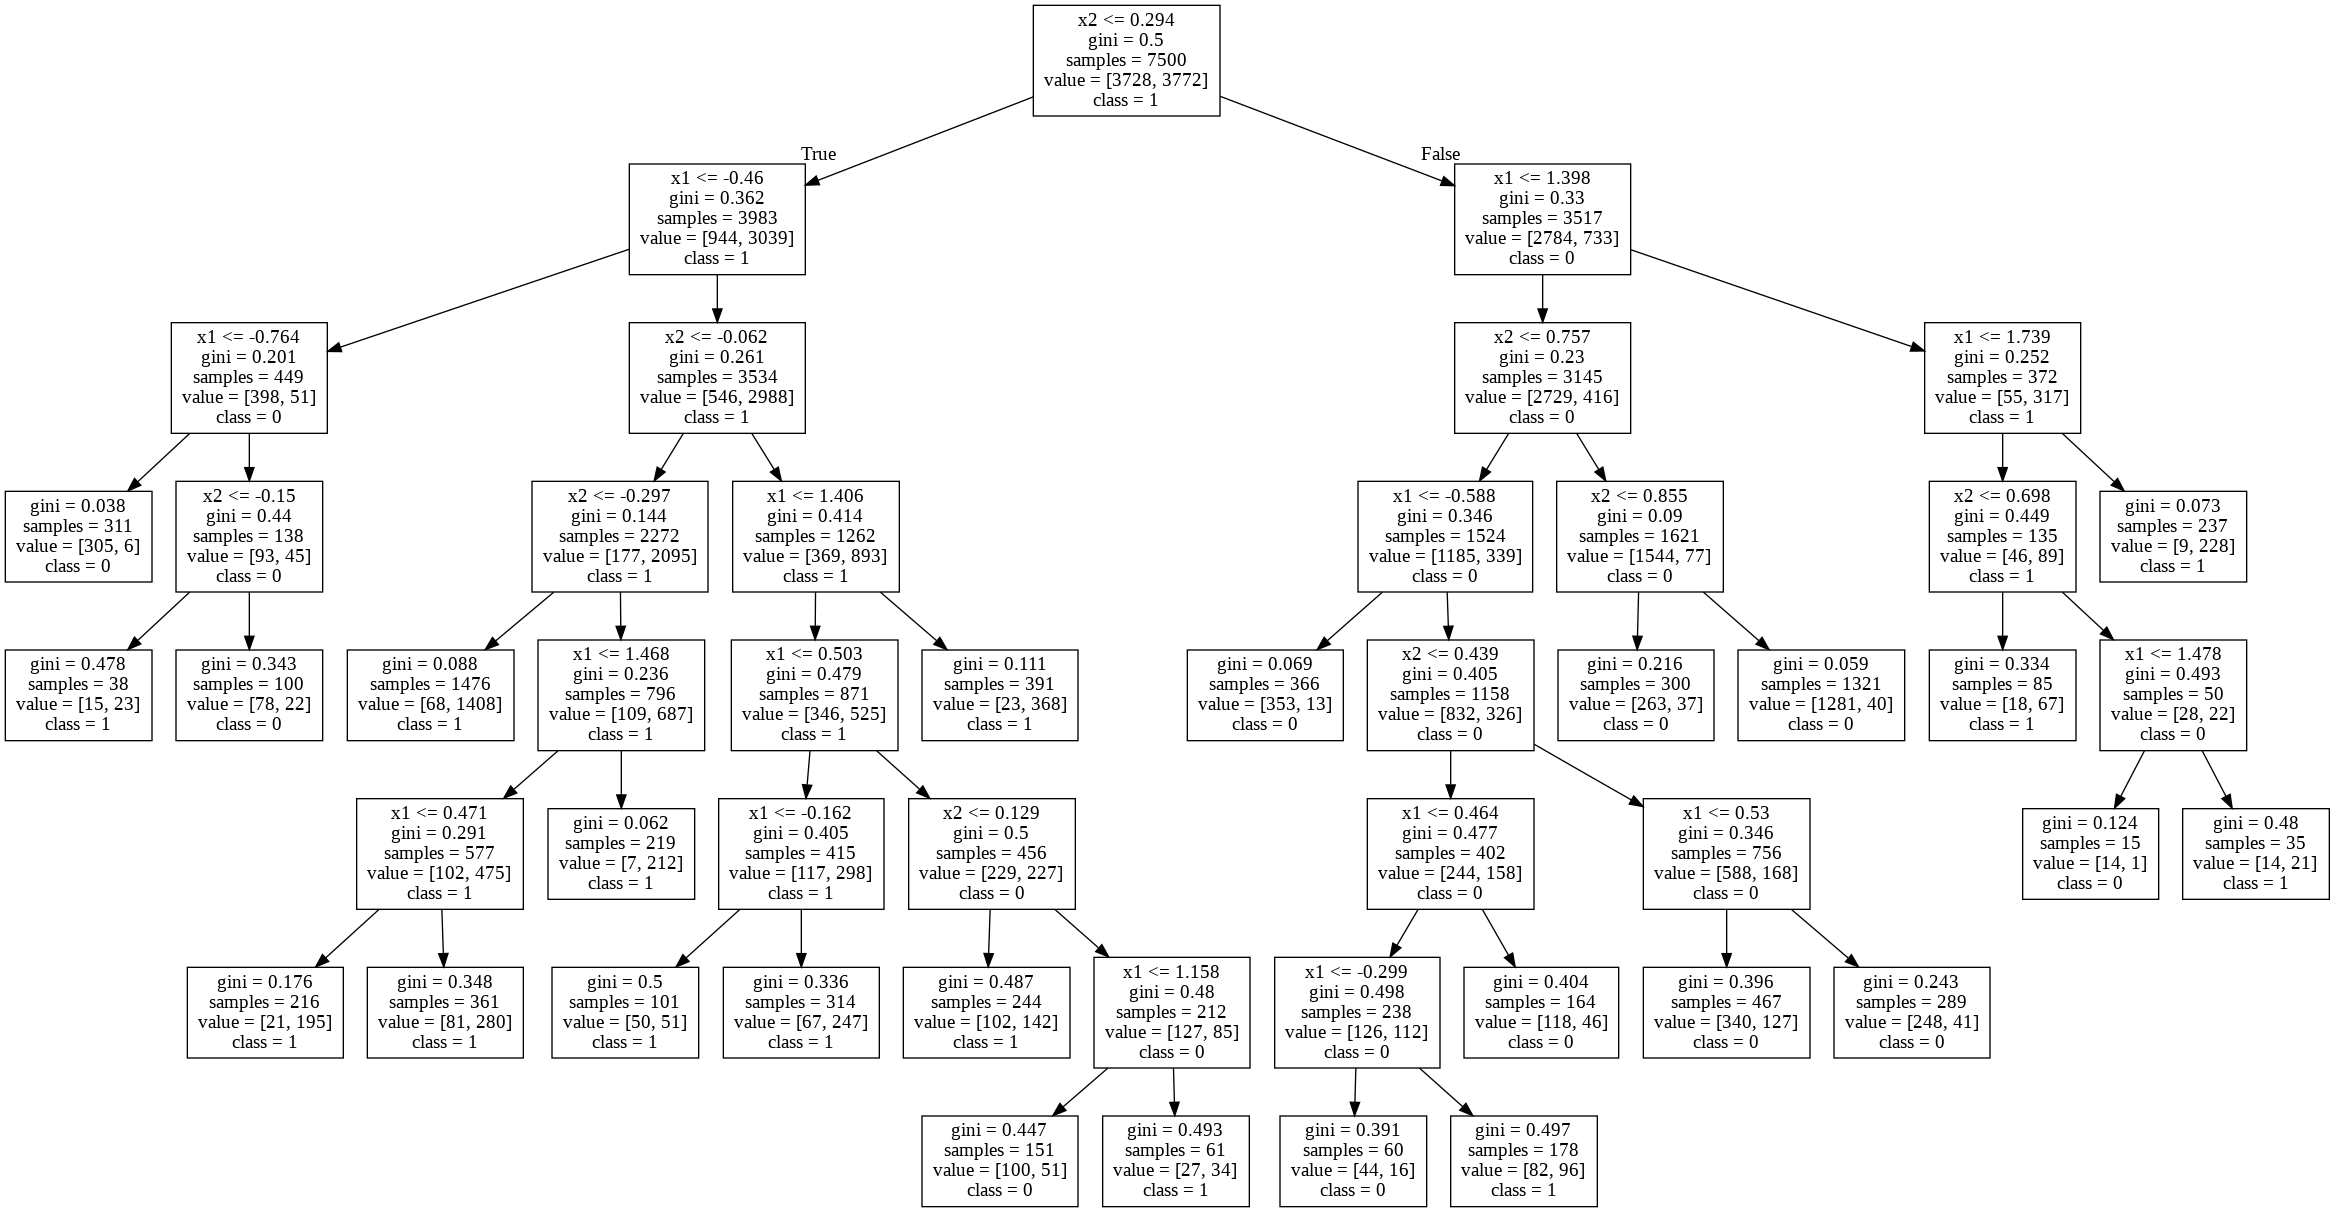

In [89]:
# Plotando a árvore de decisão:
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data, class_names=['0','1'], feature_names=['x1','x2'])
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

# **Matriz de confusão**

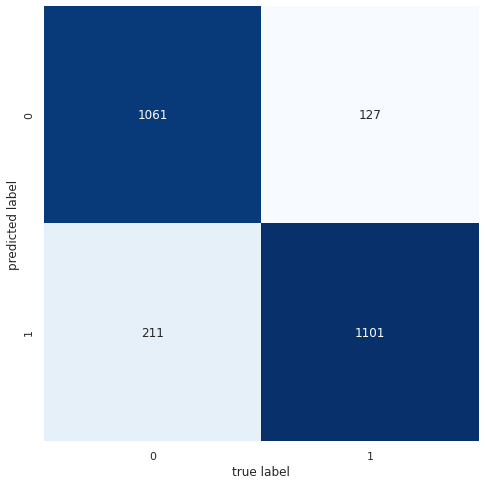

In [ ]:
# Plot the confusion matrix.
fig = plt.figure(figsize=(8, 8))
mat = confusion_matrix(y_test, y_pred)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig('confusion_matrix_dt.png', dpi=600)
plt.show()

# **Fronteira de decisão**

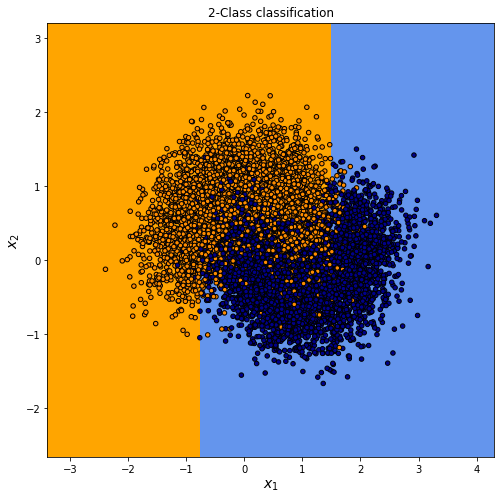

In [ ]:
# Step size in the mesh.
h = .02 

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

plt.figure(figsize=(8, 8))
# Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points.
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title("2-Class classification")

plt.savefig('decision_boundary_dt.png', dpi=600)
plt.show()

# **Curva ROC**

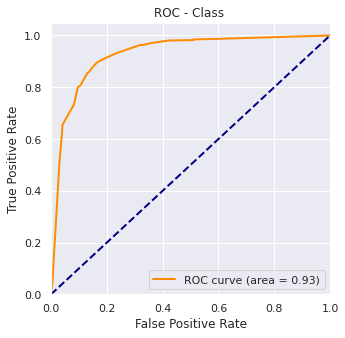

In [ ]:

# Getting the probabilities for each class.
y_prob = clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class.
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
# Plotting ROC curve.
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Class ')
plt.legend(loc="lower right")

plt.savefig('roc_dt.png', dpi=600)
plt.show()

In [ ]:
# Print classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1272
           1       0.84      0.90      0.87      1228

    accuracy                           0.86      2500
   macro avg       0.87      0.87      0.86      2500
weighted avg       0.87      0.86      0.86      2500

